# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [36]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib
from functools import reduce
import zipfile

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

### Comentarios:
Los datos corresponden a 3 tipos de atributos diferentes. 'City' y 'State' son tipo object (str) y 'Temperature' es tipo float64(número con decimales).

#### Select the rows where state is New York

In [5]:
# your answer here
temp_nyc = temp[0:3]
display(temp_nyc)

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
# your answer here
temp_nyc.mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
# your answer here
temp_p15 = temp.loc[temp['Temperature'] > 15]
display(temp_p15)

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
# your answer here
temp_p15['City']

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
# your answer here
temp_p20 = temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]
display(temp_p20)

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
# your answer here
mean_temp = temp.groupby('State', as_index=False).agg({'Temperature':'mean'}).rename(columns={"Temperature":"mean"})
std_temp = temp.groupby('State', as_index=False).agg({'Temperature':'std'}).rename(columns={"Temperature":"std"})
stats_temp = pd.merge(mean_temp,std_temp,on='State')
display(mean_temp,std_temp,stats_temp)

,State,mean
0,Connecticut,15.833333
1,New Jersey,21.111111
2,New York,10.740741


,State,std
0,Connecticut,1.964186
1,New Jersey,1.571348
2,New York,8.133404


,State,mean,std
0,Connecticut,15.833333,1.964186
1,New Jersey,21.111111,1.571348
2,New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [11]:
# your answer here
employee = pd.read_csv('Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [12]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

### Comentarios
Son 7 atributos de los cuales 5 son del tipo object (str) y 2 del tipo int64 (int).

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80ea001240>,
      dtype=object)

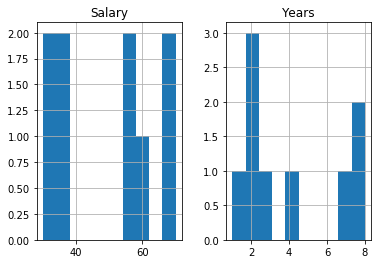

In [13]:
# your answer here
%matplotlib inline
employee.hist()

#### What's the average salary in this company?

In [14]:
# your answer here
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [15]:
# your answer here
employee['Salary'].max()

70

#### What's the lowest salary?

In [16]:
# your answer here
min = employee['Salary'].min()

#### Who are the employees with the lowest salary?

In [17]:
# your answer here
employee_min = employee.loc[employee['Salary'] == min]
display(employee_min)

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [18]:
# your answer here
employee.loc[employee['Name'] == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [19]:
# your answer here
employee.loc[employee['Name'] == 'David',['Name','Salary']]

,Name,Salary
2,David,30


#### Print all the rows where job title is associate

In [20]:
# your answer here
employee.loc[employee['Title'] == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [21]:
# your answer here- 1 method
employee.iloc[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [22]:
# your answer here- 2nd method
employee.loc[0:2]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [23]:
# your answer here
employee.loc[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [24]:
# your answer here
employee_years = employee.groupby('Years', as_index=False).agg({'Salary':'mean'})
display(employee_years)

,Years,Salary
0,1,35.000000
1,2,38.333333
2,3,55.000000
3,4,35.000000
4,7,60.000000
5,8,70.000000


####  What is the average Salary per title?

In [25]:
# your answer here
employee_title = employee.groupby('Title', as_index=False).agg({'Salary':'mean'})
display(employee_title)

,Title,Salary
0,VP,70.000000
1,analyst,32.500000
2,associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

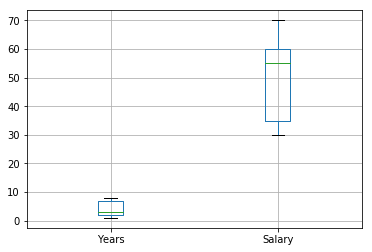

In [26]:
# draw boxplot here
%matplotlib inline
employee.boxplot()

In [70]:
# print first quartile here
stats = employee.describe()
print(stats)
print(("El primer quartile de Years es {}").format(stats.loc['25%']['Years']))
print(("El primer quartile de Salary es {}").format(stats.loc['25%']['Salary']))

          Years     Salary
count  9.000000   9.000000
mean   4.111111  48.888889
std    2.803767  16.541194
min    1.000000  30.000000
25%    2.000000  35.000000
50%    3.000000  55.000000
75%    7.000000  60.000000
max    8.000000  70.000000
El primer quartile de Years es 2.0
El primer quartile de Salary es 35.0


In [72]:
# print third quartile here
print(("El tercer quartile de Years es {}").format(stats.loc['75%']['Years']))
print(("El tercer quartile de Salary es {}").format(stats.loc['75%']['Salary']))

El tercer quartile de Years es 7.0
El tercer quartile de Salary es 60.0


#### Is the mean salary per gender different?

In [55]:
# your answer here
employee_gender = employee.groupby('Gender', as_index=False).agg({'Salary':'mean'})
display(employee_gender)

,Gender,Salary
0,F,47.5
1,M,50.0


Si el salario medio por género es diferente (es mayor el de los hombres que el de las mujeres).

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [56]:
# your answer here
def department(column,stat):
    data_frame = employee.groupby('Department',as_index=False).agg({column:stat}).rename(columns={column:column+'('+stat+')'})
    return data_frame
dept = [department('Years','min'),department('Years','mean'),\
        department('Years','max'),department('Salary','min'),department('Salary','mean'),\
        department('Salary','max')]
dept_stat = reduce(lambda left,right: pd.merge(left,right,on='Department'), dept)
#display(department('Years','min'),department('Years','mean'),department('Years','max'),department('Salary','min'),department('Salary','mean'),department('Salary','max'))
display(dept_stat)

,Department,Years(min),Years(mean),Years(max),Salary(min),Salary(mean),Salary(max)
0,HR,2,4.666667,8,30,45.00,70
1,IT,1,4.500000,8,30,48.75,70
2,Sales,2,2.500000,3,55,55.00,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [57]:
# your answer here


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [58]:
# your answer here
zf = zipfile.ZipFile('Orders.zip')
orders = pd.read_csv(zf.open('Orders.csv'))
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [59]:
# your answer here
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

**Tipo de Datos:** son 14 atributos de los cuales 4 son de tipo object (str), 2 float64 (número con decimales) y 8 int64 (números enteros). 

In [60]:
# your answer here
st_orders = orders.describe()
display(st_orders)

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


**Estadísticas:** algunas de las estadísticas no son relevantes debido a que aunque son datos numéricos, corresponden a referencias para las cuales algunos conceptos estadísticos no tienen relevancia (e.g.: la media de InvoiceNo). También hay una columna sin header que parece ser una repetición del index en las primeras filas y ya luego un antiguo index.

####  What is the average Purchase Price?

In [105]:
# your answer here
print(("La media del precio de compra es {}").format(st_orders.loc['mean']['UnitPrice']))

La media del precio de compra es 3.1161744805540756


#### What were the highest and lowest purchase prices? 

In [74]:
# your answer here
print(("El precio máximo de compra es {}").format(st_orders.loc['max']['UnitPrice']))

El precio máximo de compra es 8142.75


In [75]:
# your answer here
print(("El precio mínimo de compra es {}").format(st_orders.loc['min']['UnitPrice']))

El precio mínimo de compra es 0.0


#### Select all the customers we have in Spain

In [76]:
# your answer here
cust_spain = orders.loc[orders['Country'] == 'Spain']
display(cust_spain)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
13974,21565,538095,22504,2010,12,4,14,cabin bag vintage retrospot,1,2010-12-09 14:55:00,29.95,17097,Spain,29.95
13975,21566,538095,22212,2010,12,4,14,four hook white lovebirds,1,2010-12-09 14:55:00,2.10,17097,Spain,2.10
13976,21567,538095,22953,2010,12,4,14,birthday party cordon barrier tape,1,2010-12-09 14:55:00,1.25,17097,Spain,1.25
13977,21568,538095,84818,2010,12,4,14,danish rose photo frame,1,2010-12-09 14:55:00,2.55,17097,Spain,2.55
13978,21569,538095,21114,2010,12,4,14,lavender scented fabric heart,5,2010-12-09 14:55:00,1.25,17097,Spain,6.25


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [80]:
# your answer here
print(("Hay un total de {} clientes en España").format(len(orders['CustomerID'].value_counts())))

Hay un total de 4339 clientes en España


#### Select all the customers who have bought more than 50 items ?

In [87]:
# your answer here
cust_50 = orders.loc[orders['Quantity']>50]
cust_50 = cust_50.drop_duplicates(subset='CustomerID', keep="last").sort_index()
display(cust_50)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
376,385,536403,22867,2010,12,3,11,hand warmer bird design,96,2010-12-01 11:27:00,1.85,12791,Netherlands,177.60
673,683,536416,21915,2010,12,3,11,red harmonica in box,72,2010-12-01 11:58:00,1.25,13255,United Kingdom,90.00
928,938,536508,21326,2010,12,3,12,aged glass silver t-light holder,144,2010-12-01 12:38:00,0.55,17181,United Kingdom,79.20
1593,2158,536563,85199S,2010,12,3,15,small hanging ivory/red wood bird,72,2010-12-01 15:08:00,0.42,17760,United Kingdom,30.24
1732,2299,536573,22791,2010,12,3,15,t-light glass fluted antique,72,2010-12-01 15:45:00,1.06,17025,United Kingdom,76.32
2103,3270,536616,21137,2010,12,4,10,black record cover frame,72,2010-12-02 10:10:00,3.39,17925,United Kingdom,244.08
2162,3329,536621,22492,2010,12,4,10,mini paint set vintage,72,2010-12-02 10:35:00,0.65,13108,United Kingdom,46.80
2719,3900,536733,21094,2010,12,4,12,set/6 red spotty paper plates,60,2010-12-02 12:50:00,0.85,15738,United Kingdom,51.00


#### Select orders from Spain that are above 50 items

In [88]:
# your answer here
cust_50 = orders.loc[orders['Quantity']>50]
curt_50_spain = cust_50.loc[cust_50['Country']=='Spain']
display(curt_50_spain)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,52416,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,52417,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,52418,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,52419,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,136767,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [89]:
# your answer here
ord_free = orders.loc[orders['amount_spent']==0]
display(ord_free)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [96]:
# your answer here
ord_lunch = orders.loc[orders['Description'].str.contains("lunch bag")]
display(ord_lunch)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
361,370,536401,20726,2010,12,3,11,lunch bag woodland,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
362,371,536401,22384,2010,12,3,11,lunch bag pink polkadot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
402,411,536404,22383,2010,12,3,11,lunch bag suki design,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
403,412,536404,20728,2010,12,3,11,lunch bag cars blue,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50
404,413,536404,20727,2010,12,3,11,lunch bag black skull.,10,2010-12-01 11:29:00,1.65,16218,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [97]:
# your answer here
ord_lunch = orders.loc[orders['Description'].str.contains("lunch bag")]
ord_lunch_2011 = ord_lunch.loc[ord_lunch['year']==2011]
display(ord_lunch_2011)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26861,43617,540098,22383,2011,1,2,15,lunch bag suki design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26862,43618,540098,22382,2011,1,2,15,lunch bag spaceboy design,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26863,43619,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26864,43620,540098,20727,2011,1,2,15,lunch bag black skull.,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
26902,43658,540099,20725,2011,1,2,16,lunch bag red retrospot,10,2011-01-04 16:41:00,1.65,15808,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f80e71c6d68>]],
      dtype=object)

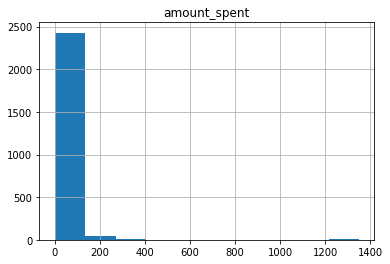

In [99]:
# your answer here
ord_spain = orders.loc[orders['Country']=='Spain']
%matplotlib inline
ord_spain.hist(column='amount_spent')

#### Select all orders made in the month of August

In [100]:
# your answer here
ord_august = orders.loc[orders['month']==8]
display(ord_august)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
199480,285426,561905,84978,2011,8,1,9,hanging heart jar t-light holder,12,2011-08-01 09:31:00,1.25,14947,United Kingdom,15.00
199481,285427,561905,21754,2011,8,1,9,home building block word,3,2011-08-01 09:31:00,5.95,14947,United Kingdom,17.85
199482,285428,561905,23226,2011,8,1,9,filigree heart daisy white,24,2011-08-01 09:31:00,1.25,14947,United Kingdom,30.00
199483,285429,561905,21715,2011,8,1,9,girls vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40
199484,285430,561905,21716,2011,8,1,9,boys vintage tin seaside bucket,8,2011-08-01 09:31:00,2.55,14947,United Kingdom,20.40


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [101]:
# your answer here
ord_august['Country'].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [103]:
# your answer here
ord_avg_country = orders.groupby('Country', as_index=False).agg({'amount_spent':'mean'})
display(ord_avg_country)

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [114]:
# your answer here
max_item = orders.groupby('Description', as_index=False).agg({'UnitPrice':'max'}).\
sort_values(by=['UnitPrice'], ascending=False)
display(max_item.head(1))

,Description,UnitPrice
2611,postage,8142.75


#### What was the average amount spent per year ?

In [115]:
# your answer here
ord_avg_year = orders.groupby('year', as_index=False).agg({'amount_spent':'mean'})
display(ord_avg_year)

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
